# Executive Summary

<u>**Data**:</u> Titanic dataset is a very famous dataset that is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival.

<u>**Goal**:</u> The goal is to build machine learning models to predict survivability of passengers.

<u>**Variable Information**:</u>

1. class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
2. name - Name
.3 sex - Sex
3. age - Age
4. sibsp - Number of Siblings/Spouses Aboard
5. parch - Number of Parents/Children Aboard
6. ticket - Ticket Number
7. fare - Passenger Fare
8. cabin - Cabin
9. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
10. boat - Lifeboat (if survived)
11. body - Body number (if did not survive and body was recovered)


*Output variable*:

1. survival - Survival (0 = No; 1 = Yes)




In [412]:
# importing libraries
import numpy as np 
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize
from sklearn import preprocessing  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, balanced_accuracy_score
import warnings
warnings.filterwarnings("ignore")
import missingno

In [413]:
# importing train and test data
train = pd.read_csv('https://raw.githubusercontent.com/meetgojiya98/Business_Analytics_MBA6636/main/Assignment%204/titanic_train.csv', sep=',')
test = pd.read_csv('https://raw.githubusercontent.com/meetgojiya98/Business_Analytics_MBA6636/main/Assignment%204/titanic_test.csv', sep=',')

# Exploratory Data Analysis

In [414]:
# checking train data
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [415]:
# checking test data
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [416]:
# checking the shape of train data
train.shape

(891, 12)

In [417]:
# checking the shape of test data
test.shape

(418, 11)

The training dataset has 891 training examples and 12 features, including the label 'Survived', while the testing dataset has 418 rows and 11 features, but no label.

In [418]:
# listing all the variables in the train dataset
train_variables = train.columns.values
for x in train_variables:
  print(x)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


Survived, Embarked, Sex, and Pclass are the categorical variables. Age, Fare, SibSp,  and Parch are numerical variables.

In [419]:
# checking the data types of all the variables in train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [420]:
# checking the data types of all the variables in train dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [421]:
# describing the train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [422]:
# describing the test data
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [423]:
# checking if there are any null values in train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [424]:
# checking if there are any null values in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [425]:
# checking if there are any duplicate values in train dataset
train.duplicated().sum()

0

In [426]:
# checking if there are any duplicate values in test dataset
train.duplicated().sum()

0

In [427]:
# combining train and test data
trainTest = [train, test]
combined = pd.concat(trainTest, sort=False)

In [428]:
# checking the shape of the combined data
combined.shape

(1309, 12)

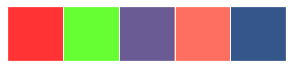

In [429]:
# setting up the color palette and size of the plots
customColors = ["#ff3333", "#66ff33", "#6B5B95", "#FF6F61", "#34568B"]
customPalette = sns.set_palette(sns.color_palette(customColors))
sns.palplot(sns.color_palette(customColors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

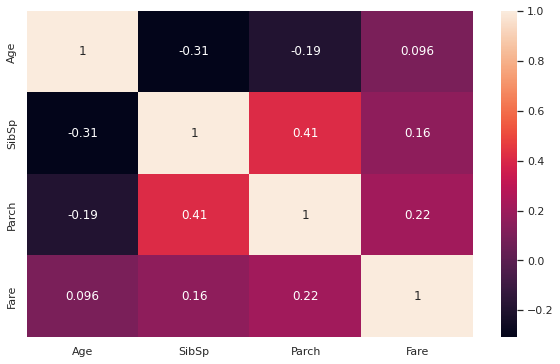

In [430]:
# plotting a heat map to visualize the correlation between numerical features
numericFeatures = train[['Age', 'SibSp', 'Parch', 'Fare']]
fig = plt.figure(figsize=(10, 6))
ax=sns.heatmap(numericFeatures.corr(), annot=True)

'SibSp' and 'Parch' have high correlation. 'Age' and 'Fare' has the least amount of linear trend among any two variables in the heatmap.

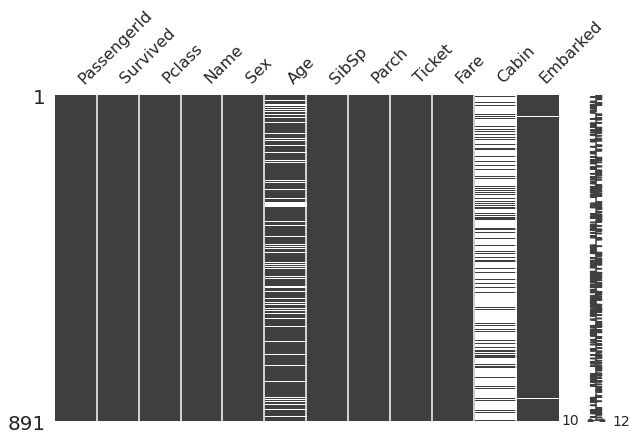

In [431]:
# visualize missing values of train data
missingno.matrix(train, figsize =(10, 6))

In the plot above, white lines represent missing values. it's clear that there are many missing values 'Cabin', 'Age', and 'Embarked' variables in the train data set.

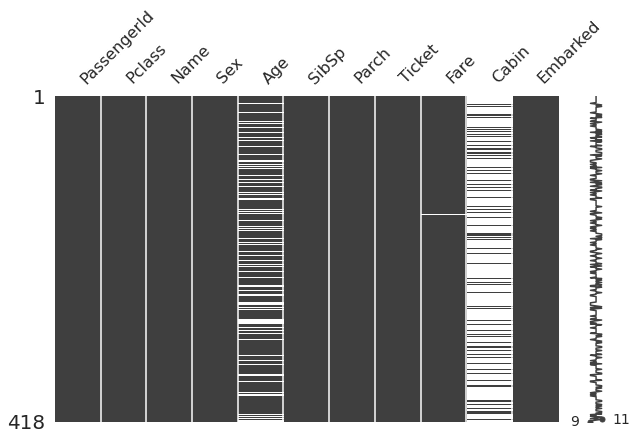

In [432]:
# visualize missing values of test data
missingno.matrix(test, figsize =(10, 6))

There are a lot of missing values 'Cabin', 'Age', and 'Fare' variables in the test data set.

In [433]:
# dropping irrelevant variables from the dataframe
drop_vars = ['Cabin', 'Ticket', 'Name', 'PassengerId']
train = train.drop(drop_vars, axis=1)
test = test.drop(drop_vars, axis=1)

In [434]:
# creating a function to plot all the categorical variables
def plot_category(var):
  fig=plt.figure(figsize=(14, 8))
  sns.countplot(x=var, hue='Survived', data=train)
  plt.xlabel(var, size=15, labelpad=15)
  plt.ylabel('Passengers', size=15, labelpad=15)
  plt.tick_params(axis='x', labelsize=15)
  plt.tick_params(axis='y', labelsize=15)
  plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 14})
  plt.title('Survival Count in {}'.format(var), size=15)
  plt.show()

  print(train[var].value_counts())

In [435]:
# creating a function to plot all the continuous variables
def plot_continuous(var):
  fig, axs=plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
  fig.tight_layout(h_pad=6)
  survived=train['Survived'] == 1
  sns.distplot(train[~survived][var], label='Not Survived', hist=True, color='#DD4124', ax=axs[0])
  sns.distplot(train[survived][var], label='Survived', hist=True, color='#34568B', ax=axs[0])
  sns.distplot(train[var], label='Train Data', hist=False, color='#e74c3c', ax=axs[1])
  sns.distplot(test[var], label='Test Data', hist=False, color='#2ecc71', ax=axs[1])
  axs[0].set_xlabel(var, size=15, labelpad=5)
  axs[1].set_xlabel(var, size=15, labelpad=5)
  axs[0].set_ylabel('')
  axs[1].set_ylabel('')
  axs[0].tick_params(axis='x', labelsize=15)
  axs[1].tick_params(axis='x', labelsize=15)
  axs[0].tick_params(axis='y', labelsize=15)
  axs[1].tick_params(axis='y', labelsize=15)
  axs[0].legend(loc='upper right', prop={'size': 14})
  axs[1].legend(loc='upper right', prop={'size': 14})
  axs[0].set_title('{} Survival Distribution'.format(var), size=15)
  axs[1].set_title('{} Distribution'.format(var), size=15)
    
  plt.show()

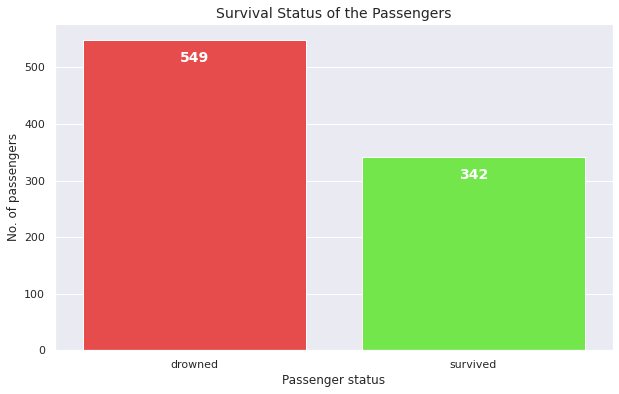

In [436]:
# visualizing the target variable - Survived
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'Survived', data = combined, palette=["#ff3333", "#66ff33"])
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Survival Status of the Passengers',fontsize= 14)
plt.xlabel('Passenger status')
plt.ylabel('No. of passengers')
labels = (combined['Survived'].value_counts())
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

There are 891 passengers in the training data set in total. Roughly 40% of them survived Titanic's crash and about 60% were drowned.

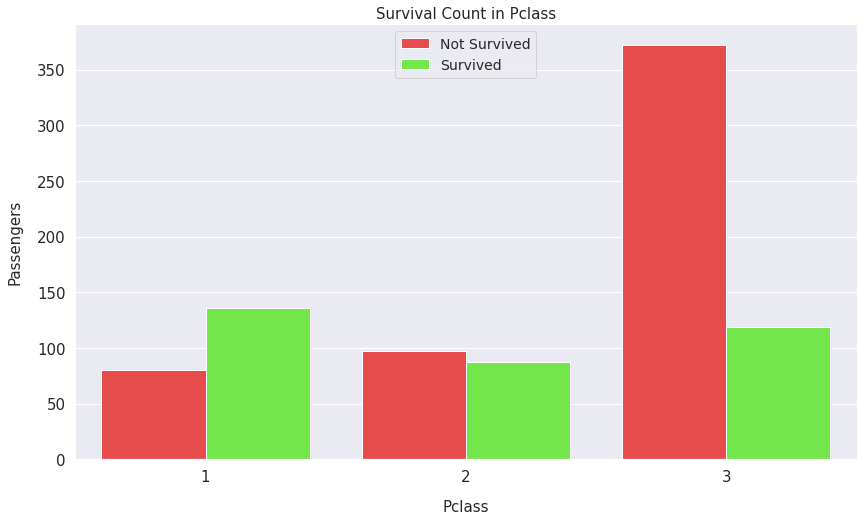

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [437]:
# visualizing the Pclass variable
plot_category('Pclass')

'Pclass' variable consists of the following passenger classes:
1. Upper class
2. Middle class
3. Lower class

Apparently, majority of the passengers in the Lower class have died in the crash. Only about 1/3rd of the third class passengers survived. Whereas for the middle class passengers, about half of the passengers survived. Upper class is the only class where more than 50% of the passengers survived the crash.

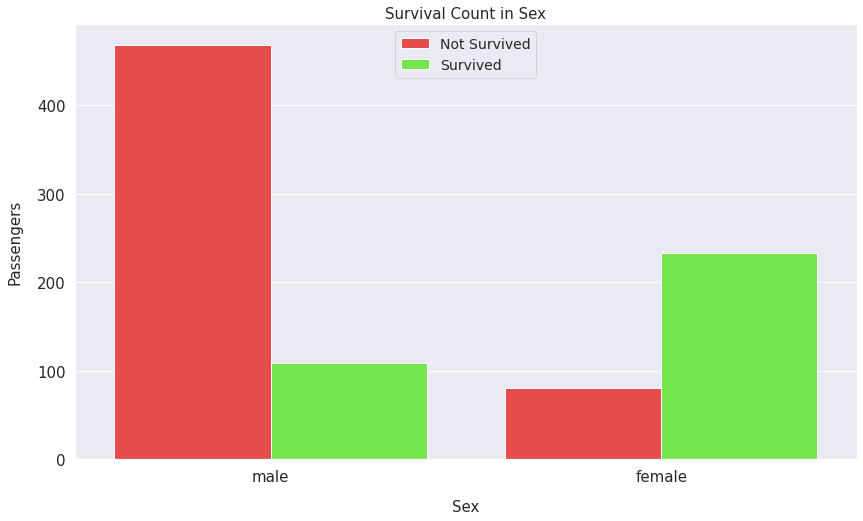

male      577
female    314
Name: Sex, dtype: int64


In [438]:
# visualizing the Sex variable
plot_category('Sex')

It's obvious from the above plot that about 65% of the passengers who didn't survived the crash were male and about 35% were female passengers.

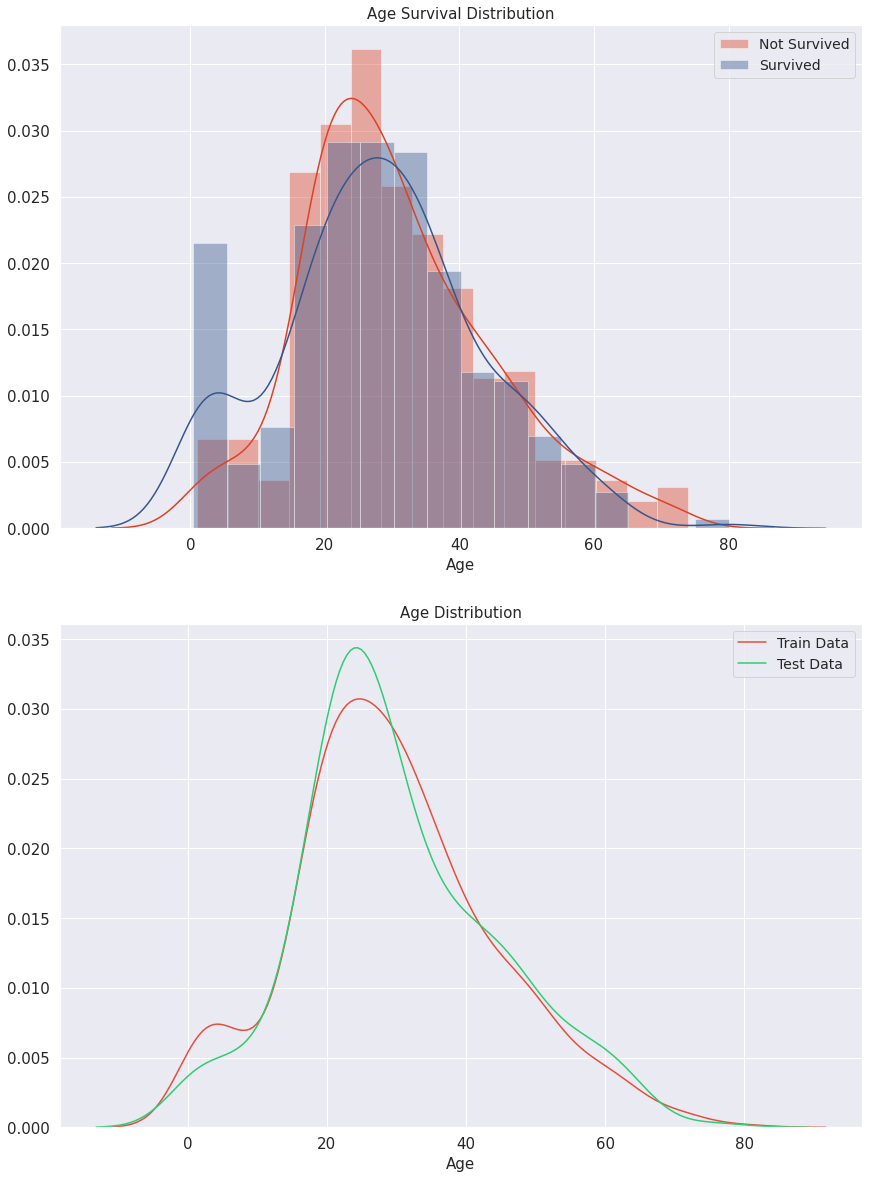

In [439]:
# visualizing the Age variable
plot_continuous('Age')

Distribution of Age variable is slightly right skewed and there doesn't seem to be any outliers.

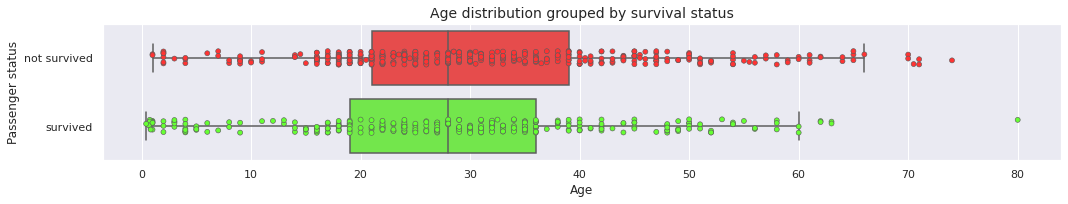

In [440]:
# plotting age distribution by survival status
plt.figure(figsize=(15, 3))
sns.boxplot(y = 'Survived', x = 'Age', data = train, palette=["#ff3333", "#66ff33"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'Survived', x = 'Age', data = train, linewidth = 0.6, palette=["#ff3333", "#66ff33"], orient = 'h')
plt.yticks( np.arange(2), ['not survived', 'survived'])
plt.title('Age distribution grouped by survival status',fontsize= 14)
plt.ylabel('Passenger status')
plt.tight_layout()

The average age of the passenger who survived is slightly lower than that who didn't survived the crash. 

In [441]:
# descriptive statistics for Age variable
agedist = pd.DataFrame(combined['Age'].describe())
agedist.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0


Age has a range that starts from 0.17 and goes all the way up to 80. The mean age is around 30 years.

In [442]:
# dealing with missing values in Age variable
for df in [train, test]:
  df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('mean'), inplace=True)

Here, I have taken the mean of the values in Age variable based on the passenger's class and sex because these two are correlated.

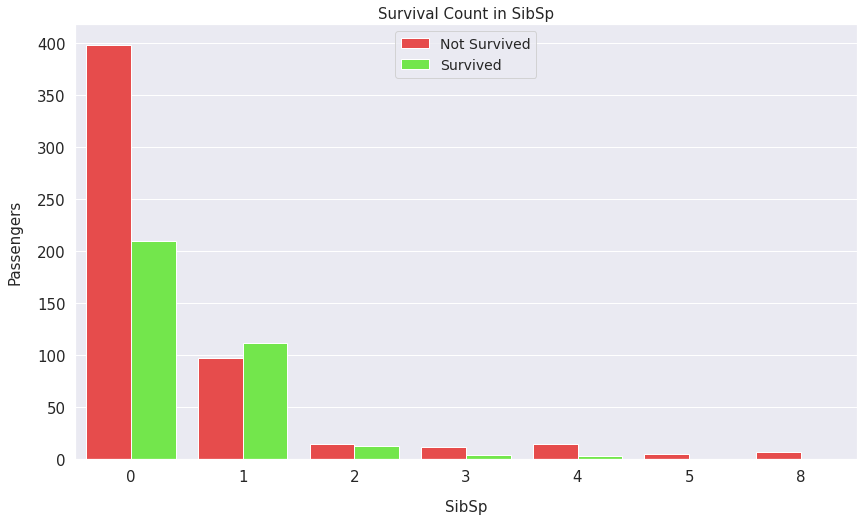

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [443]:
# visualizing the SibSp variable
plot_category('SibSp')

About half of the total passengers on the ship didn't had any siblings or spouse on the ship. And 3/4th of them didn't survived the crash.

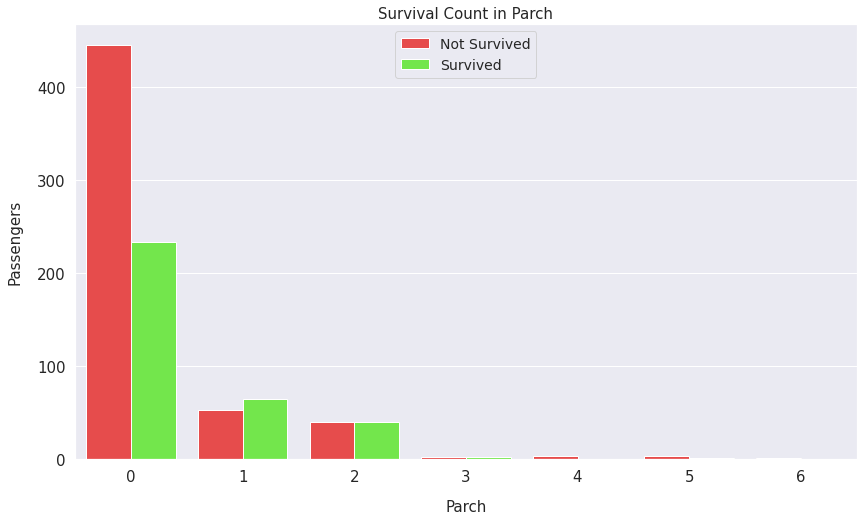

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [444]:
# visualizing the Parch variable
plot_category('Parch')

More than half of the total passengers on the ship didn't had parents or children on the ship. And 3/4th of them didn't survived the crash.

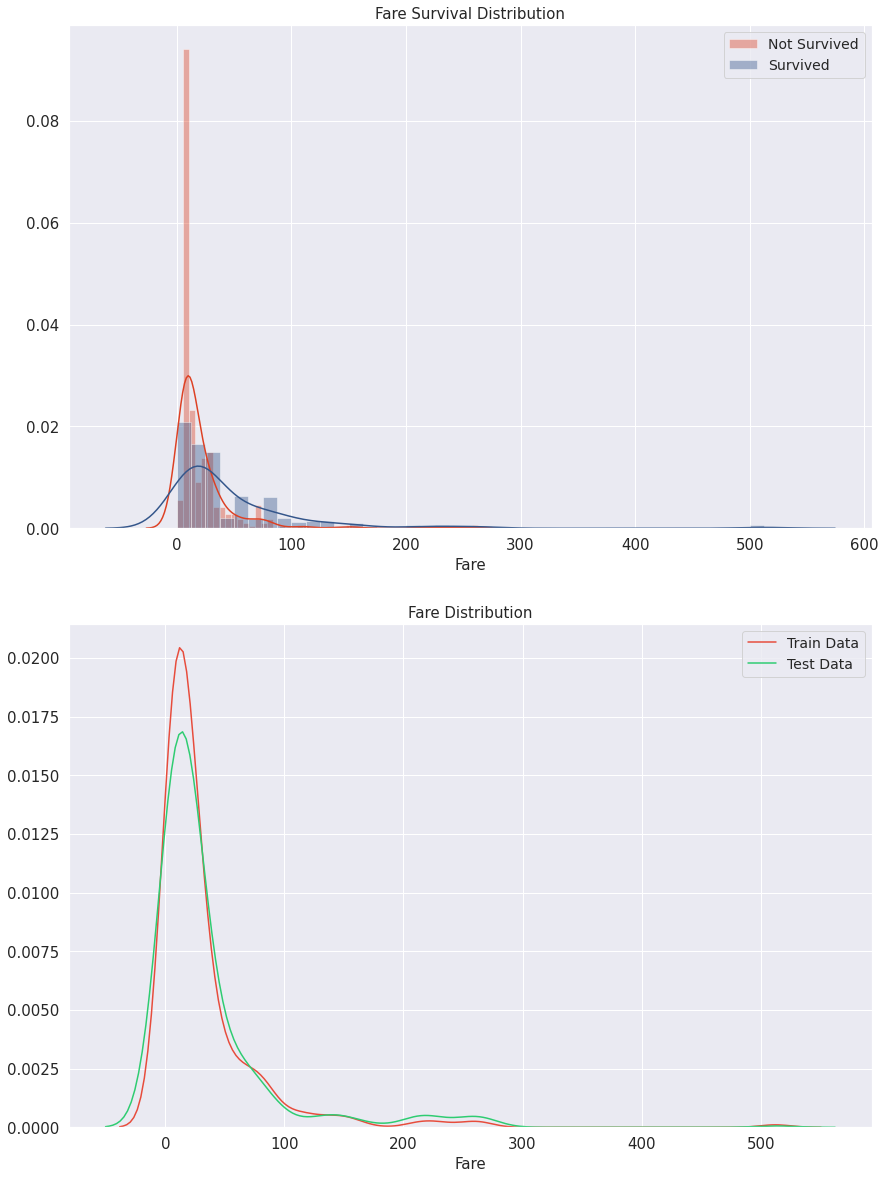

In [445]:
# visualizing the Fare variable
plot_continuous('Fare')

Distribution of Fare variable is significantly right skewed.

In [446]:
# dealing with missing value in the Fare variable
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test['Fare'].isnull().sum()

0

Since 'Fare' had only 1 missing value in the dataset, I replaced it with the mean value.

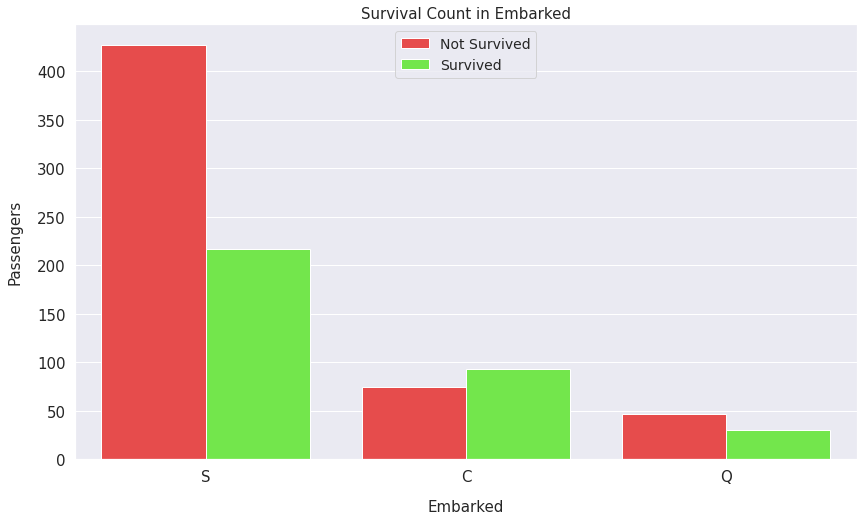

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [447]:
# visualizing the Fare variable
plot_category('Embarked')

About 70% of the passengers embarked their Titanic ourney from Southampton port. Out of which 3/4th of the passengers didn't survived the crash.

In [448]:
# dealing with the missing values in Embarked variable
train.dropna(subset=['Embarked'], inplace=True)
train['Embarked'].isnull().sum()

0

I decided to drop the rows in which 'Embarked' variable has missing values since there are only two of them.

In [449]:
# checking if there are any missing values in the training data set
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [450]:
# checking if there are any missing values in the test data set
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

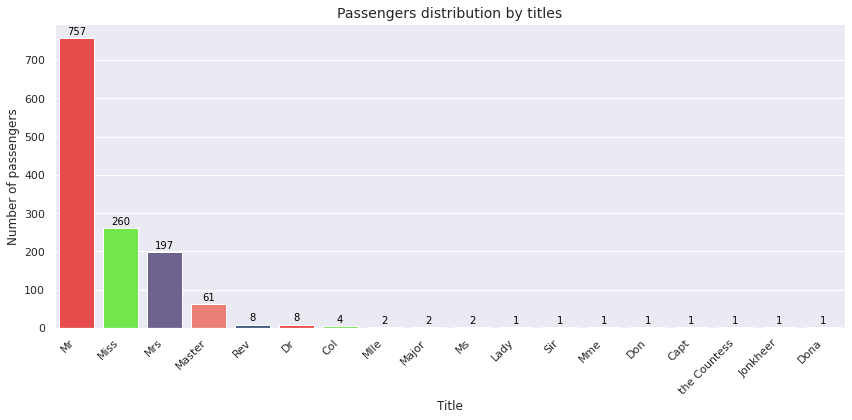

In [451]:
# visualizing the distribution of title of the passengers (Mr., Mrs., Miss, etc...)
combined['Title'] = combined['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
plt.figure(figsize=(12, 6))
ax = sns.countplot( x = 'Title', data = combined, palette = customColors, order = combined['Title'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')
labels = (combined['Title'].value_counts())
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
plt.tight_layout()
plt.show()

Majority of the passengers had a title of 'Mr', followed by 'Miss', and 'Mrs'.

# Models

In [452]:
# converting 'Sex' and 'Embark' to numeric features
l = LabelEncoder()
for df in [train, test]: 
  df['Sex']=l.fit_transform(df['Sex'])
  df['Embarked']=l.fit_transform(df['Embarked'])

In [453]:
# checking train data 
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [454]:
# checking test data 
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1


In [455]:
# train-test split
Y_train = train.loc[:, ['Survived']]
X_train = train.drop(axis=1, columns=['Survived'])
x_train, x_test, y_train, y_test=train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [456]:
# scaling and transforming data
s = StandardScaler()
s.fit(X_train)
x_train=s.transform(x_train)
x_test=s.transform(x_test)

In [457]:
# creating a function to train models 
def predict(m):
  cv = cross_val_score(m, x_train, y_train, cv=5)
  ps = precision_score(y_test, y_test)
  print('Cross Validation Score: {}'.format(cv))
  print('Cross Validation Score (mean): {}'.format(cv.mean()))
  m.fit(x_train,y_train)
  y_pred=m.predict(x_test)
  accuracy=round(accuracy_score(y_pred, y_test) * 100, 2)
  print('Model Accuracy: {} %'.format(accuracy))
  m_pred=m.predict(s.transform(test))
  print('Precision Score: {}'.format(ps))
  print('\n')
  print("Classification Report:")
  print(classification_report(y_test, y_test))
  print('\n')
  cm = np.array(confusion_matrix(y_test, y_test, labels=[1,0]))
  confusion_mat= pd.DataFrame(cm, index = ["Not-Survived", "Survived"], columns =["Predicted Not Survived", "Predicted Survived"])
  print('Confusion Matrix:')
  print(confusion_mat)
  print('\n')
  sns.heatmap(cm,annot=True,fmt='g',cmap='Set3')
  return m_pred

Cross Validation Score: [0.82517483 0.85211268 0.78873239 0.81690141 0.8028169 ]
Cross Validation Score (mean): 0.8171476410913032
Model Accuracy: 80.34 %
Precision Score: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Confusion Matrix:
              Predicted Not Survived  Predicted Survived
Not-Survived                      69                   0
Survived                           0                 109




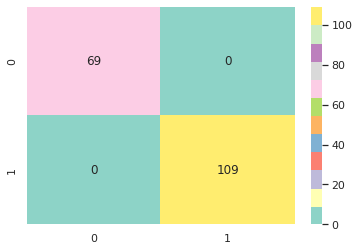

In [458]:
# support vector machine
svc=SVC(gamma=1.0, probability=True)
svc_pred=predict(svc)

Cross Validation Score: [0.83916084 0.85211268 0.84507042 0.83098592 0.82394366]
Cross Validation Score (mean): 0.8382547030434354
Model Accuracy: 80.34 %
Precision Score: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Confusion Matrix:
              Predicted Not Survived  Predicted Survived
Not-Survived                      69                   0
Survived                           0                 109




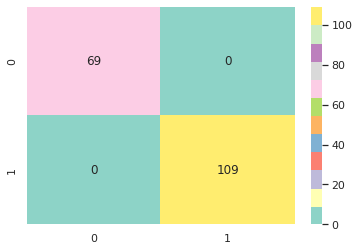

In [459]:
# random forest classifier
rf=RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=7, n_estimators=550, random_state=42)
rf_pred=predict(rf)

Cross Validation Score: [0.72027972 0.82394366 0.79577465 0.77464789 0.76056338]
Cross Validation Score (mean): 0.7750418595489018
Model Accuracy: 74.16 %
Precision Score: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Confusion Matrix:
              Predicted Not Survived  Predicted Survived
Not-Survived                      69                   0
Survived                           0                 109




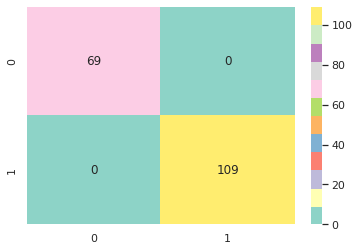

In [460]:
# decision tree classifier
dt=DecisionTreeClassifier(random_state=1)
dt_pred=predict(dt)

Cross Validation Score: [0.82517483 0.79577465 0.82394366 0.80985915 0.78873239]
Cross Validation Score (mean): 0.808696936865951
Model Accuracy: 82.02 %
Precision Score: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Confusion Matrix:
              Predicted Not Survived  Predicted Survived
Not-Survived                      69                   0
Survived                           0                 109




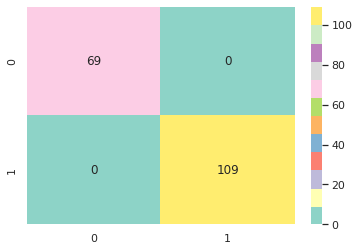

In [461]:
# k nearest neighbour classifier
knn = KNeighborsClassifier(n_neighbors=13)
knn_pred=predict(knn)

Cross Validation Score: [0.84615385 0.83098592 0.8028169  0.8028169  0.80985915]
Cross Validation Score (mean): 0.8185265438786565
Model Accuracy: 81.46 %
Precision Score: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Confusion Matrix:
              Predicted Not Survived  Predicted Survived
Not-Survived                      69                   0
Survived                           0                 109




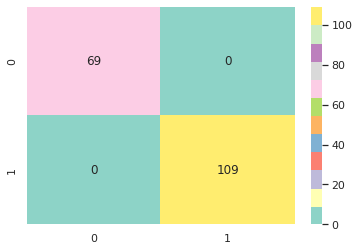

In [462]:
# AdaBoost classifier
adc=AdaBoostClassifier(random_state=1)
adc_pred=predict(adc)

For all the models that were built, 

* True positive is 69
* True negative is 109
* False positive is 0 (Type I error)
* False negative is 0 (Type II error)

The prediction had a total of 178 accurate results and 0 non-accurate results!




k-nearest neighbor model gave us the best performance with the accuracy of 82.02%, followed AdaBoost classifier (81.46% accuracy). Support vector machine and Random Forest classifier has the accuracy of 80.34%. The model that performed the worst is Decision Tree Classifier with the accuracy of 74.16%.